In [1]:
import os
import sys
import json
import argparse
from easydict import EasyDict
from importlib import import_module
import numpy as np

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
os.chdir("/opt/ml/code/mmdetection_trash/Mybaseline")

In [ ]:
config = 'config00'

In [3]:
path = '/opt/ml/code/mmdetection_trash/Mybaseline'
args = EasyDict()
with open(f'{path}/config/{config}.json', 'r') as f:
    args.update(json.load(f))

In [4]:
classes = ("UNKNOWN", "General trash", "Paper", "Paper pack", "Metal", "Glass", 
       "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
RGB_cols = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255), (0,255,255), (150,150,150)]
colors = ['red', 'lime', 'blue', 'yellow', 'fuchsia', 'cyan', 'gainsboro']

In [5]:
augmentation_module = getattr(import_module("augmentation"), args.augmentation)
train_augmentation= augmentation_module(1.0, args.resize)

dataset_module = getattr(import_module("dataset"), args.dataset)
train_dataset = dataset_module(args.annotation, args.data_dir)
aug_dataset = dataset_module(args.annotation, args.data_dir, train_augmentation)

loading annotations into memory...
Done (t=3.79s)
creating index...
index created!
loading annotations into memory...
Done (t=4.45s)
creating index...
index created!


In [6]:
idx = 0

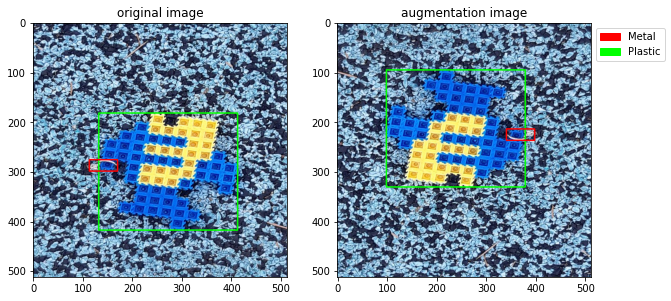

In [8]:
idx += 1

a_train_dataset = train_dataset[idx]
image = (a_train_dataset[0]*255).astype(np.uint8)
boxes = a_train_dataset[1]['boxes'].astype(np.int)
labels = a_train_dataset[1]['labels'].cpu().numpy()

a_aug_dataset = aug_dataset[idx]
aug_image = (a_aug_dataset[0]*255).cpu().numpy().transpose((1,2,0)).astype(np.uint8)
aug_boxes = a_aug_dataset[1]['boxes'].cpu().numpy().astype(np.int)
aug_labels = a_aug_dataset[1]['labels'].cpu().numpy()

legend_list = []
label2col = {}
for i, label in enumerate(set(labels)):
    legend_list.append(mpatches.Patch(color=colors[i], label=classes[label]))
    label2col[label] = i

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

for i in range(len(boxes)):
    ob = cv2.rectangle(image, boxes[i][:2], boxes[i][2:], RGB_cols[label2col[labels[i]]], 2)
    aug_ob = cv2.rectangle(aug_image, aug_boxes[i][:2], aug_boxes[i][2:], RGB_cols[label2col[aug_labels[i]]], 2)
    #plt.text((boxes[i][0]+boxes[i][2])/2, boxes[i][1]-2, classes[labels[i]], ha='center', va='bottom',color=colors[label2col[labels[i]]] ,weight='semibold', label=labels[i])


ax1.set_title('original image')
ax1.imshow(ob)

ax2.legend(handles = legend_list, bbox_to_anchor=(1,1), loc='upper left')
ax2.set_title('augmentation image')                                                       
ax2.imshow(aug_ob)

plt.show()